# Introduction
In this section, we will process some models using processed data

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from scipy import stats
from sklearn import metrics
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [62]:
# read dataset
data = pd.read_csv('Dataset_edited/processed_data.csv')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19555 entries, 0 to 19554
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        19555 non-null  float64
 1   sex                        19555 non-null  int64  
 2   on_thyroxine               19555 non-null  int64  
 3   query_on_thyroxine         19555 non-null  int64  
 4   on_antithyroid_medication  19555 non-null  int64  
 5   sick                       19555 non-null  int64  
 6   pregnant                   19555 non-null  int64  
 7   thyroid_surgery            19555 non-null  int64  
 8   query_hypothyroid          19555 non-null  int64  
 9   query_hyperthyroid         19555 non-null  int64  
 10  lithium                    19555 non-null  int64  
 11  goitre                     19555 non-null  int64  
 12  tumor                      19555 non-null  int64  
 13  TSH                        19555 non-null  flo

In [64]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Target
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
1,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0
2,80.0,0,0,0,0,0,0,0,0,0,0,0,0,2.20,0.6,80.0,0.70,115.0,0
3,66.0,0,0,0,0,0,0,0,0,0,0,0,1,0.60,2.2,123.0,0.93,132.0,0
4,68.0,1,0,0,0,0,0,0,0,0,0,0,0,2.40,1.6,83.0,0.89,93.0,0


# Correlation Matrix

### Most related to the _Target_

#### Feature Scaling

In the new dataset, using number to replace name:

0 means False, 1 means True

Sex: 0 means Female, 1 means Male

Target: 0 means 'negativee', 1 means 'hypothyroid', 2 means 'hyperthyroid'

In [65]:
corr_values = abs(data[data.columns].corr()['Target']).drop('Target')
high_corr_values = corr_values[corr_values>0.04]
high_corr_values

sex                   0.071489
on_thyroxine          0.069057
query_hypothyroid     0.060746
query_hyperthyroid    0.079067
tumor                 0.043465
TSH                   0.250161
FTI                   0.052016
Name: Target, dtype: float64

We can know that, except for five parameters [TSH, T3, TT4, T4U, FTI], the sex, on_thyroxine, query_hypothyroid, query_hyperthyroid and tomor are slightly high related to the Target.

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19555 entries, 0 to 19554
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        19555 non-null  float64
 1   sex                        19555 non-null  int64  
 2   on_thyroxine               19555 non-null  int64  
 3   query_on_thyroxine         19555 non-null  int64  
 4   on_antithyroid_medication  19555 non-null  int64  
 5   sick                       19555 non-null  int64  
 6   pregnant                   19555 non-null  int64  
 7   thyroid_surgery            19555 non-null  int64  
 8   query_hypothyroid          19555 non-null  int64  
 9   query_hyperthyroid         19555 non-null  int64  
 10  lithium                    19555 non-null  int64  
 11  goitre                     19555 non-null  int64  
 12  tumor                      19555 non-null  int64  
 13  TSH                        19555 non-null  flo

## Divide dataset - Train and Test

In [67]:
X_columns = ['sex','on_thyroxine','query_hypothyroid','query_hyperthyroid','tumor','TSH','T3','TT4','T4U','FTI']
X = data[X_columns]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Classifier

In [68]:
classifiers = {
    "XGB Classifier" : XGBClassifier(learning_rate=0.08),
    "CatBoost Classifier" : CatBoostClassifier(max_depth=3,verbose=0),
    "K Nearest Neighbors" : KNeighborsClassifier(4),
    "Decision Tree" : DecisionTreeClassifier(class_weight = 'balanced'),
    "Random Forest": RandomForestClassifier(class_weight = 'balanced',random_state = 1),
    "ExtraTrees": ExtraTreesClassifier(class_weight = 'balanced',random_state = 1),
    "MLP Classifier": MLPClassifier(activation="relu",random_state=1),
    "Bagging Classifier": BaggingClassifier(KNeighborsClassifier(), max_samples=0.5),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=10),
    "GradientBoosting Classifier": GradientBoostingClassifier(random_state=1)
}

In [69]:
def classification(classifiers, X_train, X_test, y_train, y_test):
    # Creo un dataframe per visualizzare i risultati calcolati
    res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "F1-Score"])    
                                    
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        precision, recall, f1, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
        res = res.append({"Classifier": name, "Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                          "Precision": round(precision, 4), "Recall":round(recall, 4), "F1-Score":round(f1, 4)}, ignore_index=True)
        print("Confusion matrix for: ", name)
        print(confusion_matrix(y_test, y_pred))
        
    res.set_index("Classifier", inplace=True)
    res.sort_values(by="F1-Score", ascending=False, inplace=True)   
    return res

display(classification(classifiers, X_train, X_test, y_train, y_test))

Confusion matrix for:  XGB Classifier
[[6914  113   51]
 [  61  506    0]
 [  30    0  147]]
Confusion matrix for:  CatBoost Classifier
[[6922  110   46]
 [  70  496    1]
 [  42    1  134]]
Confusion matrix for:  K Nearest Neighbors
[[6964   93   21]
 [ 297  268    2]
 [  99    2   76]]
Confusion matrix for:  Decision Tree
[[6897  116   65]
 [  88  479    0]
 [  34    0  143]]
Confusion matrix for:  Random Forest
[[6908  115   55]
 [  75  492    0]
 [  36    0  141]]
Confusion matrix for:  ExtraTrees
[[6897  115   66]
 [ 123  442    2]
 [  40    3  134]]
Confusion matrix for:  MLP Classifier
[[6922  138   18]
 [  87  478    2]
 [  81   10   86]]
Confusion matrix for:  Bagging Classifier
[[6928  105   45]
 [ 246  318    3]
 [  80    2   95]]
Confusion matrix for:  AdaBoost Classifier
[[7036   35    7]
 [ 390  152   25]
 [ 139    0   38]]
Confusion matrix for:  GradientBoosting Classifier
[[6904  124   50]
 [  22  545    0]
 [  38    0  139]]


,Accuracy,Precision,Recall,F1-Score
Classifier,,,,
GradientBoosting Classifier,0.9701,0.8472,0.9073,0.8749
XGB Classifier,0.9674,0.8490,0.8999,0.8731
CatBoost Classifier,0.9655,0.8472,0.8699,0.8582
Random Forest,0.9641,0.8380,0.8801,0.8581
Decision Tree,0.9613,0.8251,0.8757,0.8486
ExtraTrees,0.9554,0.8099,0.8370,0.8224
MLP Classifier,0.9570,0.8504,0.7690,0.7954
Bagging Classifier,0.9385,0.7892,0.6921,0.7339
K Nearest Neighbors,0.9343,0.8174,0.6286,0.6972


In [70]:
display(data.shape)
data.Target.value_counts()

(19555, 19)

0    17702
1     1403
2      450
Name: Target, dtype: int64

# Imbalance Class
## SMOTE - Over-sampling

In [71]:
smote = SMOTE('not majority',random_state = 1)
X_sm, y_sm = smote.fit_sample(X, y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.4, random_state=42)

print(X_train.shape)
print(X_train_sm.shape)
display(classification(classifiers,X_train_sm, X_test_sm, y_train_sm, y_test_sm))

(11733, 10)
(31863, 10)
Confusion matrix for:  XGB Classifier
[[6936  148   95]
 [   8 7080    0]
 [   7    0 6969]]
Confusion matrix for:  CatBoost Classifier
[[6900  155  124]
 [  17 7071    0]
 [   6    7 6963]]
Confusion matrix for:  K Nearest Neighbors
[[6715  268  196]
 [  94 6994    0]
 [  85    0 6891]]
Confusion matrix for:  Decision Tree
[[6978  125   76]
 [  94 6994    0]
 [  39    0 6937]]
Confusion matrix for:  Random Forest
[[6977  134   68]
 [  28 7060    0]
 [  10    0 6966]]
Confusion matrix for:  ExtraTrees
[[6947  135   97]
 [  62 7024    2]
 [  20    1 6955]]
Confusion matrix for:  MLP Classifier
[[6846  220  113]
 [  39 7045    4]
 [ 443    0 6533]]
Confusion matrix for:  Bagging Classifier
[[6497  383  299]
 [  27 7061    0]
 [  62    1 6913]]
Confusion matrix for:  AdaBoost Classifier
[[6587  175  417]
 [1835 4969  284]
 [ 108   37 6831]]
Confusion matrix for:  GradientBoosting Classifier
[[6878  158  143]
 [   9 7078    1]
 [  20    0 6956]]


,Accuracy,Precision,Recall,F1-Score
Classifier,,,,
Random Forest,0.9887,0.9888,0.9888,0.9887
XGB Classifier,0.9879,0.9880,0.9880,0.9879
CatBoost Classifier,0.9855,0.9856,0.9856,0.9854
ExtraTrees,0.9851,0.9851,0.9852,0.9851
GradientBoosting Classifier,0.9844,0.9846,0.9846,0.9844
Decision Tree,0.9843,0.9843,0.9844,0.9843
K Nearest Neighbors,0.9697,0.9698,0.9700,0.9697
Bagging Classifier,0.9637,0.9645,0.9641,0.9634
MLP Classifier,0.9614,0.9621,0.9613,0.9615


## Under-sampling

In [72]:
negative_df = data[data.Target==0]
hypothyroid_df = data[data.Target==1]
hyperthyroid_df = data[data.Target==2]

negative_undersampled = resample(negative_df,replace=False,n_samples=450,random_state=123)
hypothyroid_undersampled = resample(hypothyroid_df,replace=False,n_samples=450,random_state=123)

downsampled_df = pd.concat([negative_undersampled,hypothyroid_undersampled,hyperthyroid_df])
downsampled_df.Target.value_counts()

2    450
1    450
0    450
Name: Target, dtype: int64

In [73]:
X_under = downsampled_df[X_columns]
y_under = downsampled_df['Target']
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=42)
display(classification(classifiers,X_train_under, X_test_under, y_train_under, y_test_under))

Confusion matrix for:  XGB Classifier
[[124  10   3]
 [  0 129   0]
 [  1   0 138]]
Confusion matrix for:  CatBoost Classifier
[[126   8   3]
 [  1 128   0]
 [  1   0 138]]
Confusion matrix for:  K Nearest Neighbors
[[115  12  10]
 [ 32  96   1]
 [ 12   1 126]]
Confusion matrix for:  Decision Tree
[[126   8   3]
 [ 11 118   0]
 [  2   0 137]]
Confusion matrix for:  Random Forest
[[127   7   3]
 [  1 128   0]
 [  0   0 139]]
Confusion matrix for:  ExtraTrees
[[118  14   5]
 [  6 118   5]
 [  4   0 135]]
Confusion matrix for:  MLP Classifier
[[114  11  12]
 [  6 122   1]
 [  8   2 129]]
Confusion matrix for:  Bagging Classifier
[[109  22   6]
 [ 29  97   3]
 [  9   2 128]]
Confusion matrix for:  AdaBoost Classifier
[[125   6   6]
 [ 36  87   6]
 [ 19   0 120]]
Confusion matrix for:  GradientBoosting Classifier
[[127   7   3]
 [  1 128   0]
 [  1   0 138]]


,Accuracy,Precision,Recall,F1-Score
Classifier,,,,
Random Forest,0.9728,0.9731,0.9731,0.9725
GradientBoosting Classifier,0.9704,0.9705,0.9707,0.9701
CatBoost Classifier,0.9679,0.9681,0.9683,0.9676
XGB Classifier,0.9654,0.9663,0.9660,0.9650
Decision Tree,0.9407,0.9405,0.9400,0.9402
ExtraTrees,0.9160,0.9156,0.9158,0.9152
MLP Classifier,0.9012,0.9009,0.9020,0.9009
K Nearest Neighbors,0.8321,0.8412,0.8300,0.8323
Bagging Classifier,0.8247,0.8258,0.8228,0.8237


## ROC 

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [75]:
 def multi_models_roc(classifiers, X_test, y_test, save=True, dpin=100):
        plt.figure(figsize=(20, 20), dpi=dpin)

        for (name, method) in zip(classifiers.keys(), classifiers.values()):
  
            method.fit(X_train_sm, y_train_sm)
            y_test_preds = method.predict(X_test)
            y_test_predprob = method.predict_proba(X_test)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)

            plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)))
            plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
            plt.axis('square')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('False Positive Rate',fontsize=20)
            plt.ylabel('True Positive Rate',fontsize=20)
            plt.title('ROC Curve',fontsize=25)
            plt.legend(loc='lower right',fontsize=20)

        if save:
            plt.savefig('multi_models_roc.png')

        return plt

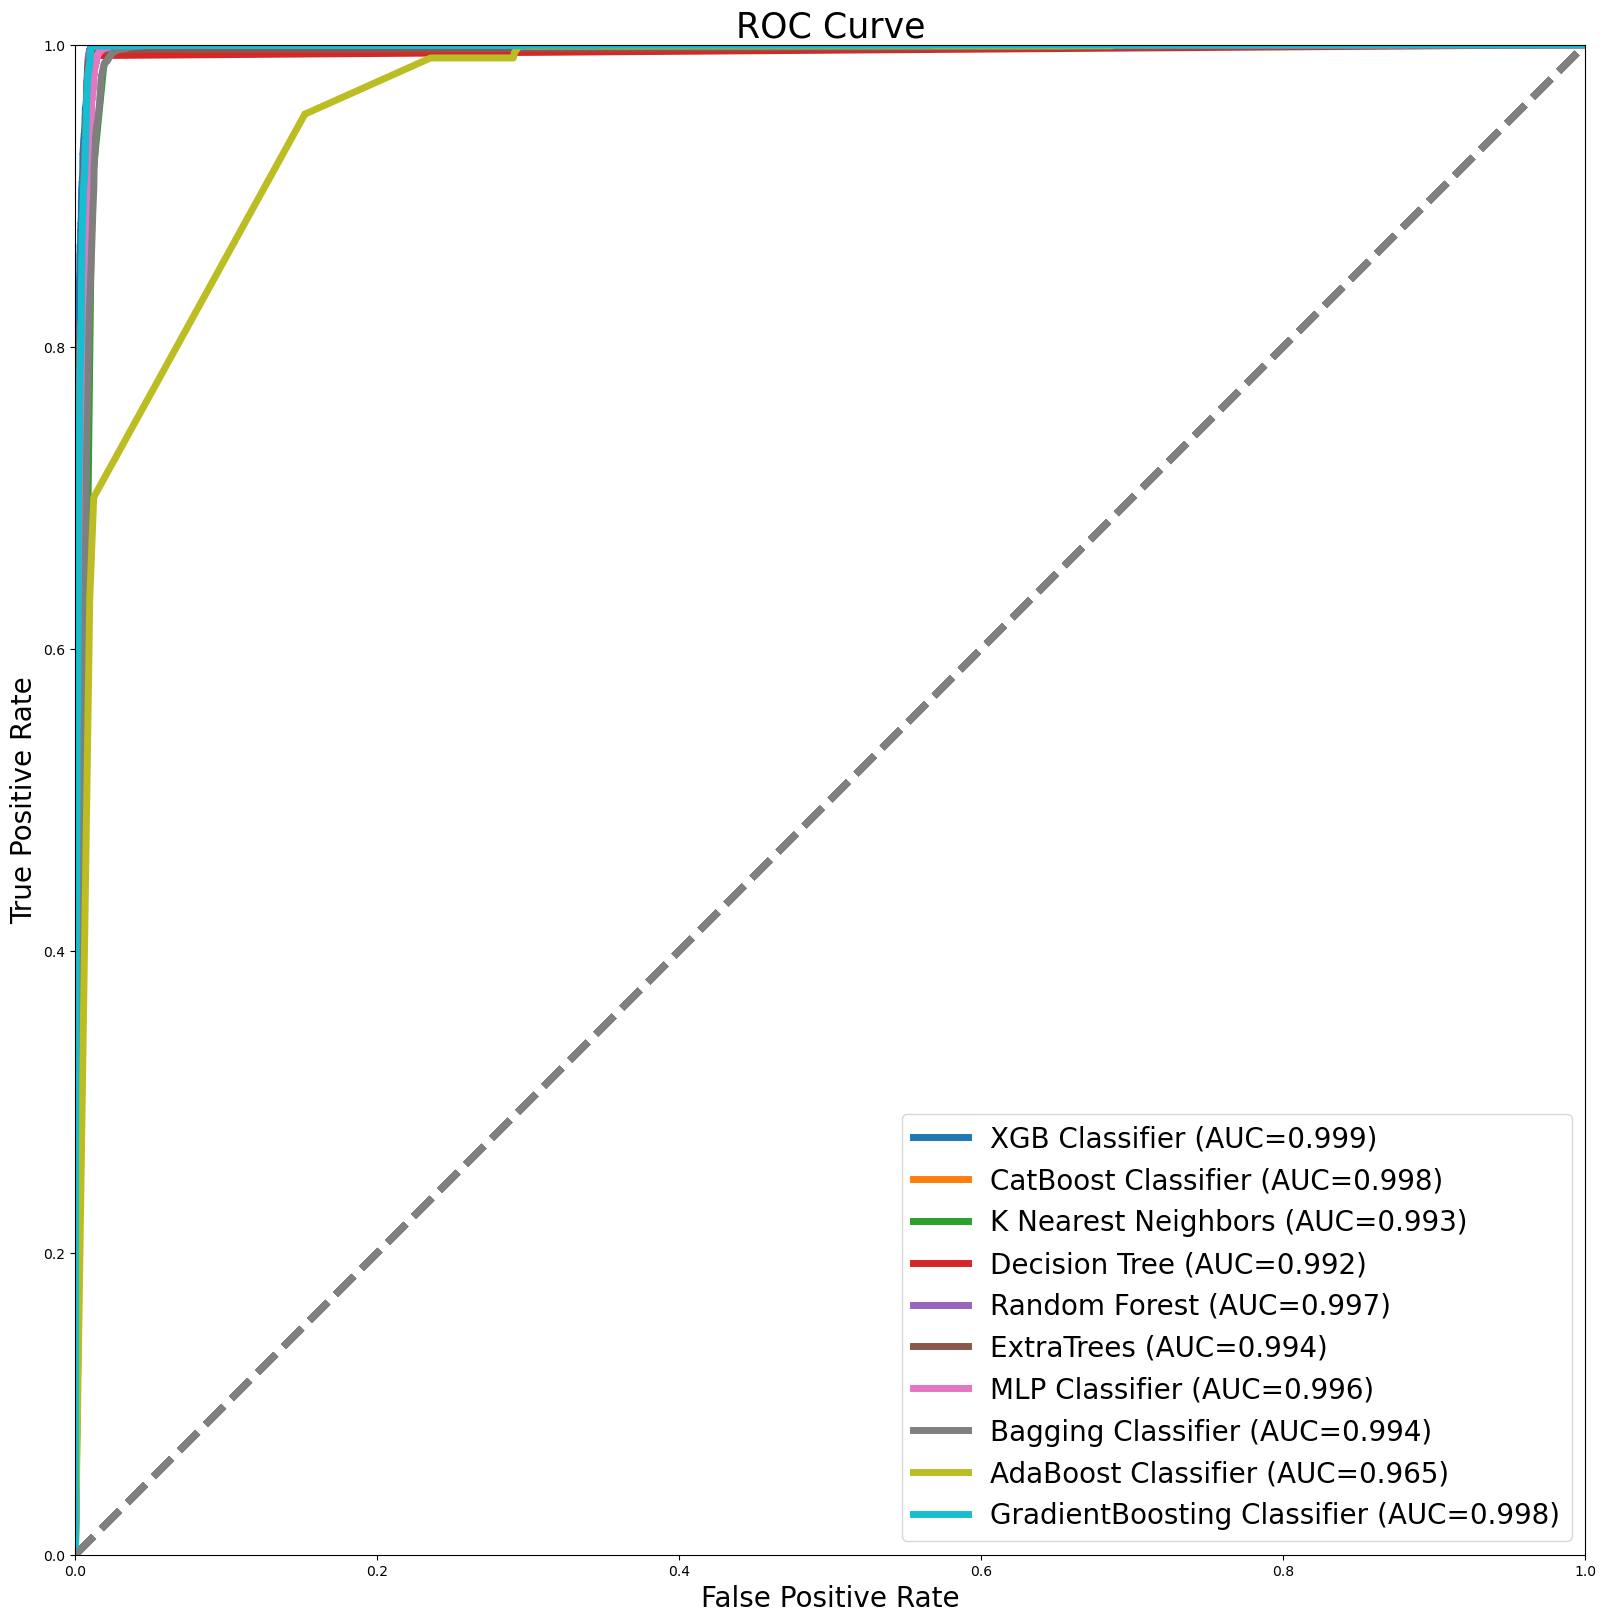

In [76]:

#ROC curves
train_roc_graph = multi_models_roc(classifiers, X_test_sm, y_test_sm, save = True)
train_roc_graph.savefig('ROC_Train_all.png')

==end==

<!-- 加入图像

优化 -->
